## Download dataset

In [1]:
!pip3 install opendatasets --quiet

In [2]:
import opendatasets as od

In [3]:
dataset='https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset'

In [4]:
od.download(dataset)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alrafiaurnob
Your Kaggle Key: ··········


100%|██████████| 41.0M/41.0M [00:04<00:00, 10.3MB/s]


In [5]:
import os
data_dir='fake-and-real-news-dataset/'

In [6]:

os.listdir(data_dir)

['True.csv', 'Fake.csv']

## Preprocessing the data

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
fake_df=pd.read_csv('fake-and-real-news-dataset/Fake.csv')
fake_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [9]:

true_df=pd.read_csv('fake-and-real-news-dataset/True.csv')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [10]:
true_df['category']=1
fake_df['category']=0

#### Concat the fake and real data

In [11]:
raw_df=pd.concat([true_df,fake_df],ignore_index=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


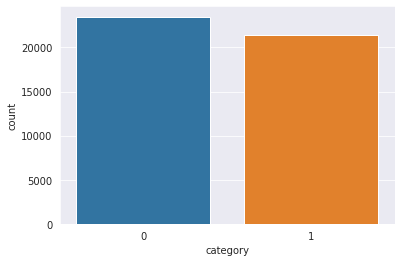

In [12]:
sns.set_style("darkgrid")
sns.countplot(raw_df.category)

In [13]:
raw_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [14]:
raw_df.isna().sum()

title       0
text        0
subject     0
date        0
category    0
dtype: int64

In [15]:
raw_df.title.count()

44898

In [16]:
raw_df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

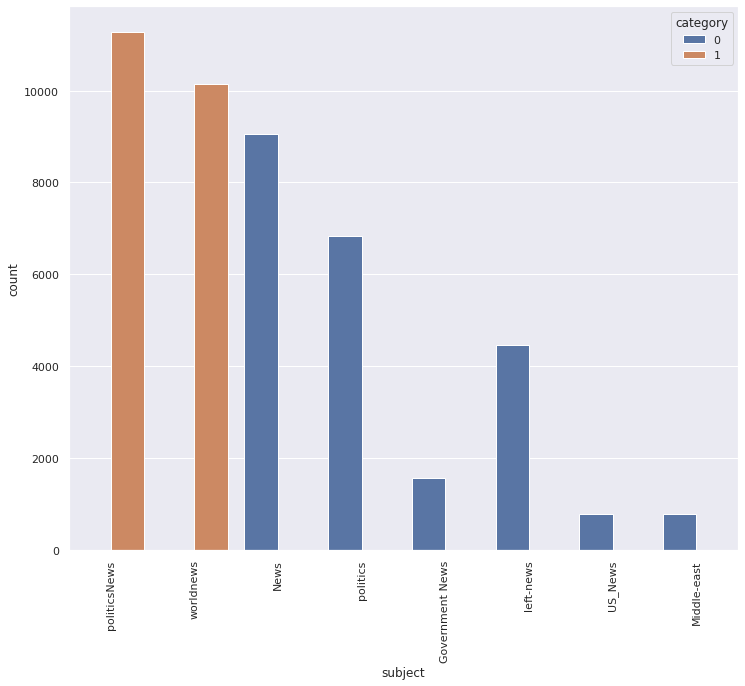

In [17]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
chart=sns.countplot(x="subject",hue="category",data=raw_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [18]:

raw_df["text"]=raw_df["text"] + " " +raw_df["title"]

In [19]:
del raw_df['title']
del raw_df['subject']
del raw_df['date']

In [20]:

raw_df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


## Data Cleaning

In [21]:
import nltk
from bs4 import BeautifulSoup
import re,string,unicodedata
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import STOPWORDS,WordCloud

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
stemmer=SnowballStemmer(language='english')
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text)]

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
english_stopwords=stopwords.words('english')

In [27]:
vectorizer=TfidfVectorizer(
    lowercase=True,
    tokenizer=tokenize,
    stop_words=english_stopwords,
    max_features=1000
)

In [28]:
%%time
vectorizer.fit(raw_df.text)

/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 4min 41s, sys: 932 ms, total: 4min 42s
Wall time: 4min 47s


TfidfVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f4920619d30>)

In [29]:
%%time
inputs=vectorizer.transform(raw_df.text)

CPU times: user 4min 35s, sys: 681 ms, total: 4min 36s
Wall time: 4min 35s


In [30]:
inputs.shape

(44898, 1000)

In [31]:
targets=raw_df.category.values

In [32]:
targets.shape

(44898,)

## Creating training and testing set

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_inputs,test_inputs,train_targets,test_targets=train_test_split(inputs,targets,shuffle=True,test_size=0.25,random_state=42)

In [35]:
train_inputs.shape , test_inputs.shape

((33673, 1000), (11225, 1000))

In [36]:
train_targets.shape ,test_targets.shape

((33673,), (11225,))

## Split train and validation set

In [37]:
train_inputs,val_inputs,train_targets,val_targets=train_test_split(train_inputs,train_targets,shuffle=True,random_state=42,test_size=.15)

In [38]:
train_inputs.shape ,val_inputs.shape

((28622, 1000), (5051, 1000))

In [39]:
train_targets.shape , val_targets.shape

((28622,), (5051,))

In [42]:
train_inputs

<28622x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 2882673 stored elements in Compressed Sparse Row format>

## Converting Pytorch Tensors

In [43]:
import torch
from torch.utils.data import TensorDataset,dataloader
import torch.nn.functional as F

In [44]:
train_tensors=F.normalize(torch.tensor(train_inputs.toarray()).float(),dim=0)
val_tensors=F.normalize(torch.tensor(val_inputs.toarray()).float(),dim=0)

In [45]:
train_tensors.shape ,val_tensors.shape

(torch.Size([28622, 1000]), torch.Size([5051, 1000]))

In [50]:
train_ds=TensorDataset(train_tensors,torch.tensor(train_targets))
val_ds=TensorDataset((val_tensors),torch.tensor(val_targets))

In [53]:
batch_size=128


In [54]:
train_dl=dataloader.DataLoader(train_ds,batch_size,shuffle=True)
val_dl=dataloader.DataLoader(val_ds,batch_size)

In [55]:
for inputs_batch,targets_batch in train_dl:
  print('inputs.shape',inputs_batch.shape)
  print('targets.shape',targets_batch.shape)
  print(targets_batch)
  break 

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
tensor([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 0, 1, 0])


## Logistic Regression Model

In [56]:
import torch.nn as nn